# I. Import Libraries, Preferences, and Helper Functions

## Libraries

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Preferences

In [2]:
# Suppress warnings
warnings.filterwarnings('ignore')

# Set the default Seaborn style
sns.set_theme(style='whitegrid', font='serif')

# Dataset URL
DATASETURL = 'https://raw.githubusercontent.com/aelluminate/databank/refs/heads/main/2024-10/mobile-user-behaviour/behaviour.csv'

## Helper Functions

### Distribution of Specific Columns

In [21]:
def distribution_of_data(data, column):
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot the distribution of the data with dynamic bins
    sns.histplot(data[column], kde=True, ax=ax)

    # Set the title and labels
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

    # Show the plot
    plt.show()

### Comparative Analysis

In [17]:
def comparative_analysis(data, metrics):
    for metric in metrics:
        plt.figure(figsize=(12, 6))
        sns.barplot(data=data, x='Operating System', y=metric, hue='Device Model', palette='husl', ci=None)

        # Add titles and labels
        plt.title(f'Comparative Analysis of {metric} by Device Model and OS')
        plt.xlabel('Operating System')
        plt.ylabel(metric)
        plt.legend(title='Device Model', bbox_to_anchor=(1.05, 1), loc='upper left')

        # Show the plot
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()

### Segmentation Analysis

In [22]:
def segmentation_analysis(data, x, y, hue):
  plt.figure(figsize=(12, 6))
  sns.barplot(data=data, x=x, y=y, hue=hue, palette='husl', ci=None)

  # Add titles and labels
  plt.title(f'Average {y} by {x} and {hue}')
  plt.xlabel(x)
  plt.ylabel(f'Average {y}')
  plt.legend(title=hue, bbox_to_anchor=(1.05, 1), loc='upper left')

  # Show the plot
  plt.xticks(rotation=0)
  plt.tight_layout()
  plt.show()

# II. Exploratory Data Analysis: General

In [5]:
data = pd.read_csv(DATASETURL)

# Preview the first 5 rows of the dataset
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,700.0,350.500000,202.216880,1.0,175.75,350.5,525.25,700.0
App Usage Time (min/day),700.0,271.128571,177.199484,30.0,113.25,227.5,434.25,598.0
Screen On Time (hours/day),700.0,5.272714,3.068584,1.0,2.50,4.9,7.40,12.0
Battery Drain (mAh/day),700.0,1525.158571,819.136414,302.0,722.25,1502.5,2229.50,2993.0
Number of Apps Installed,700.0,50.681429,26.943324,10.0,26.00,49.0,74.00,99.0
Data Usage (MB/day),700.0,929.742857,640.451729,102.0,373.00,823.5,1341.00,2497.0
Age,700.0,38.482857,12.012916,18.0,28.00,38.0,49.00,59.0
User Behavior Class,700.0,2.990000,1.401476,1.0,2.00,3.0,4.00,5.0


In [8]:
data.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [9]:
data.duplicated().sum()

np.int64(0)

### Drop Unnecessary Columns

In [10]:
data.drop(columns=['User ID'], inplace=True)

# Preview columns
data.columns

Index(['Device Model', 'Operating System', 'App Usage Time (min/day)',
       'Screen On Time (hours/day)', 'Battery Drain (mAh/day)',
       'Number of Apps Installed', 'Data Usage (MB/day)', 'Age', 'Gender',
       'User Behavior Class'],
      dtype='object')

# III. Feature Engineering

In [11]:
num_col = data.select_dtypes(include=np.number).columns
cat_col = data.select_dtypes(exclude=np.number).columns

print(f'[Numerical]\n{num_col}\n')
print(f'[Categorical]\n{cat_col}')

[Numerical]
Index(['App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'User Behavior Class'],
      dtype='object')

[Categorical]
Index(['Device Model', 'Operating System', 'Gender'], dtype='object')


In [12]:
for col in cat_col:
    unique_values = data[col].unique()
    value_counts = data[col].value_counts()
    print(f'[{col}]')
    for value in unique_values:
        print(f'{value}: {value_counts[value]}')
    print()

[Device Model]
Google Pixel 5: 142
OnePlus 9: 133
Xiaomi Mi 11: 146
iPhone 12: 146
Samsung Galaxy S21: 133

[Operating System]
Android: 554
iOS: 146

[Gender]
Male: 364
Female: 336



# IV. Exploratory Data Analysis: Visualization

## Distributions

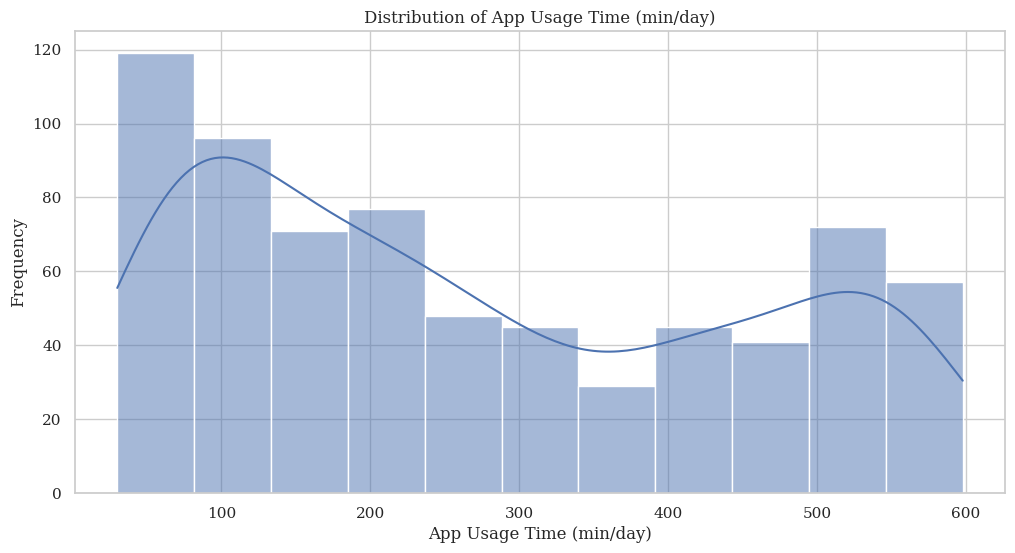

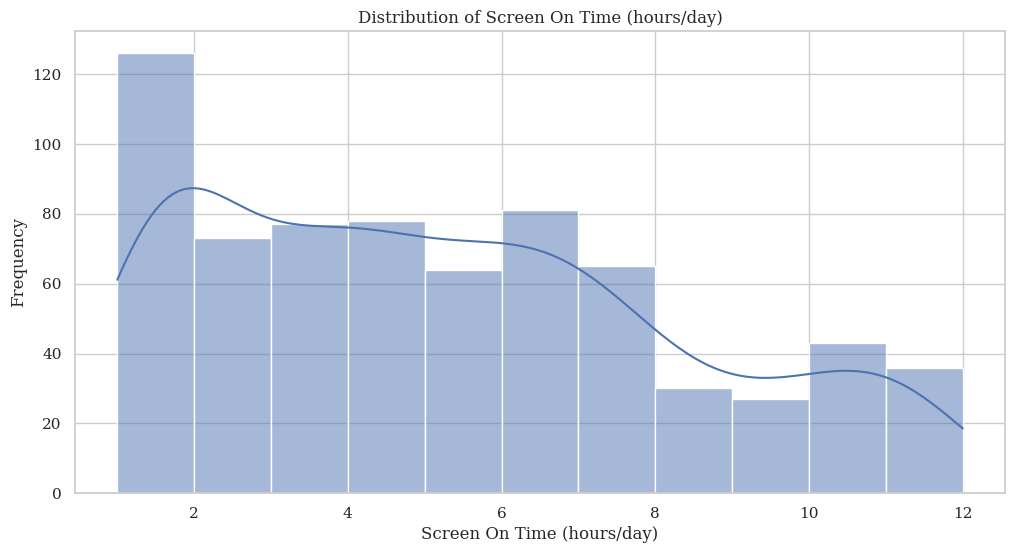

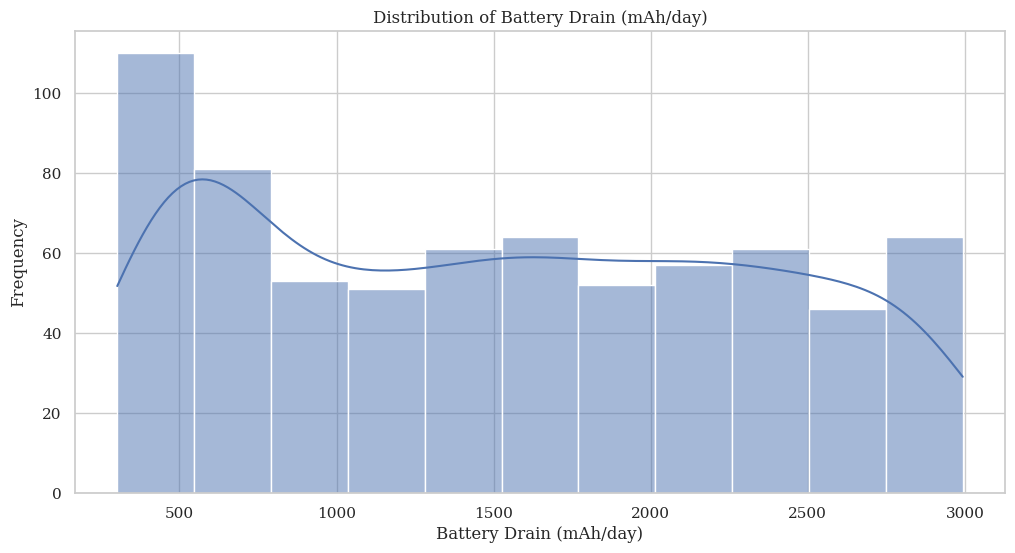

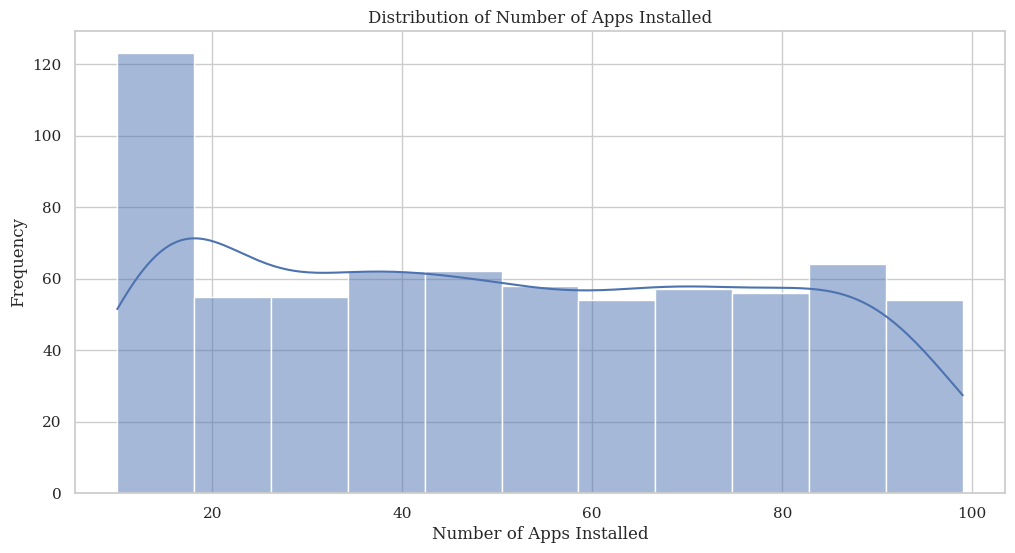

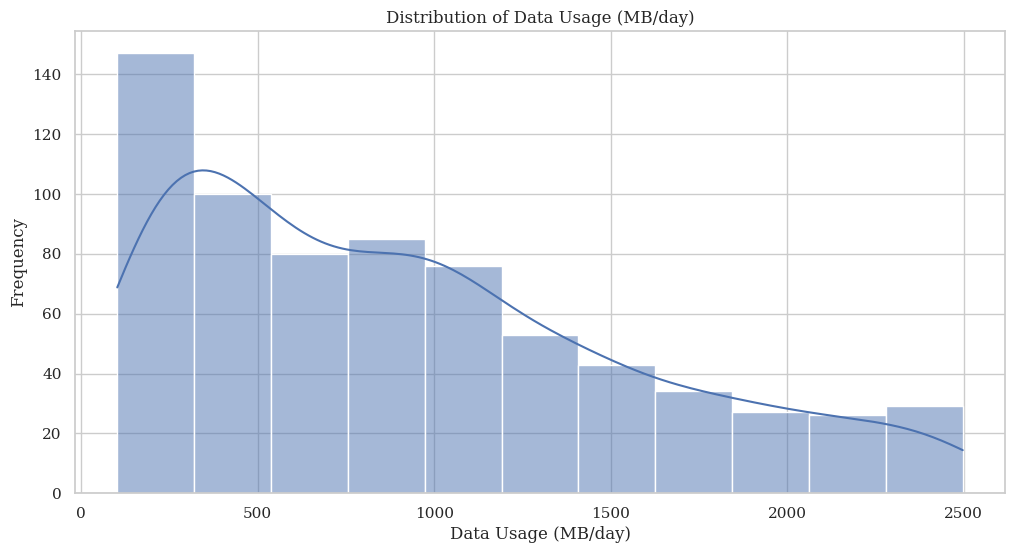

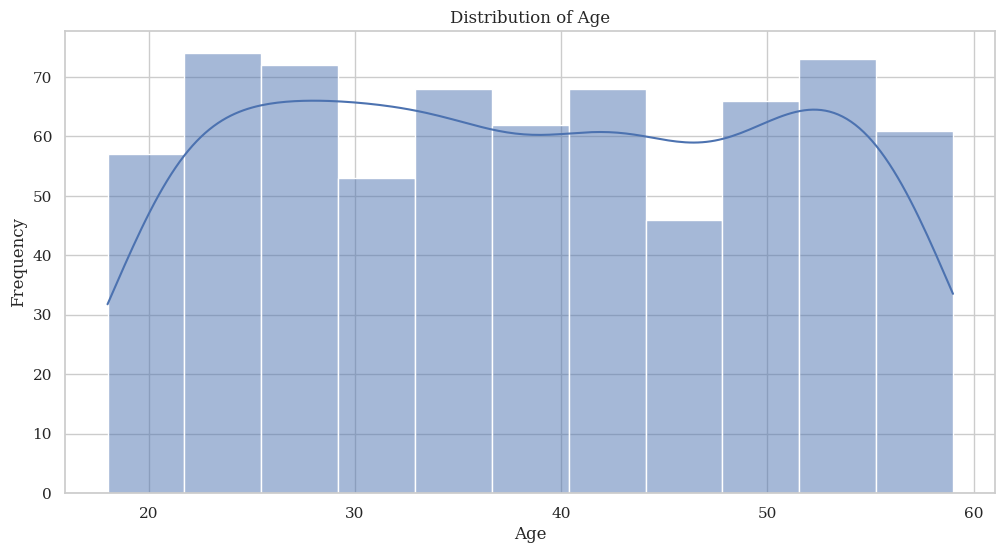

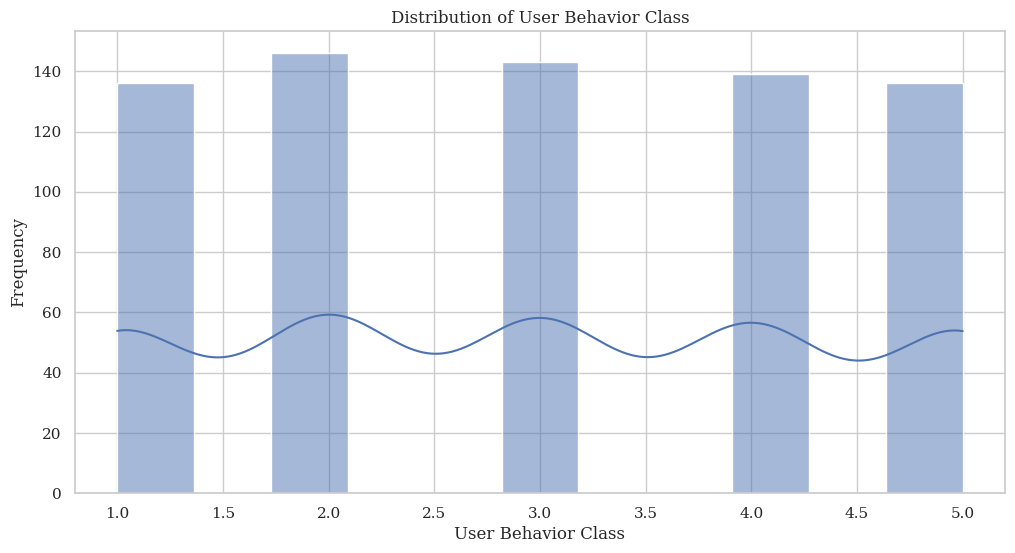

In [13]:
for col in num_col:
    distribution_of_data(data, col)

## Correlation Analysis

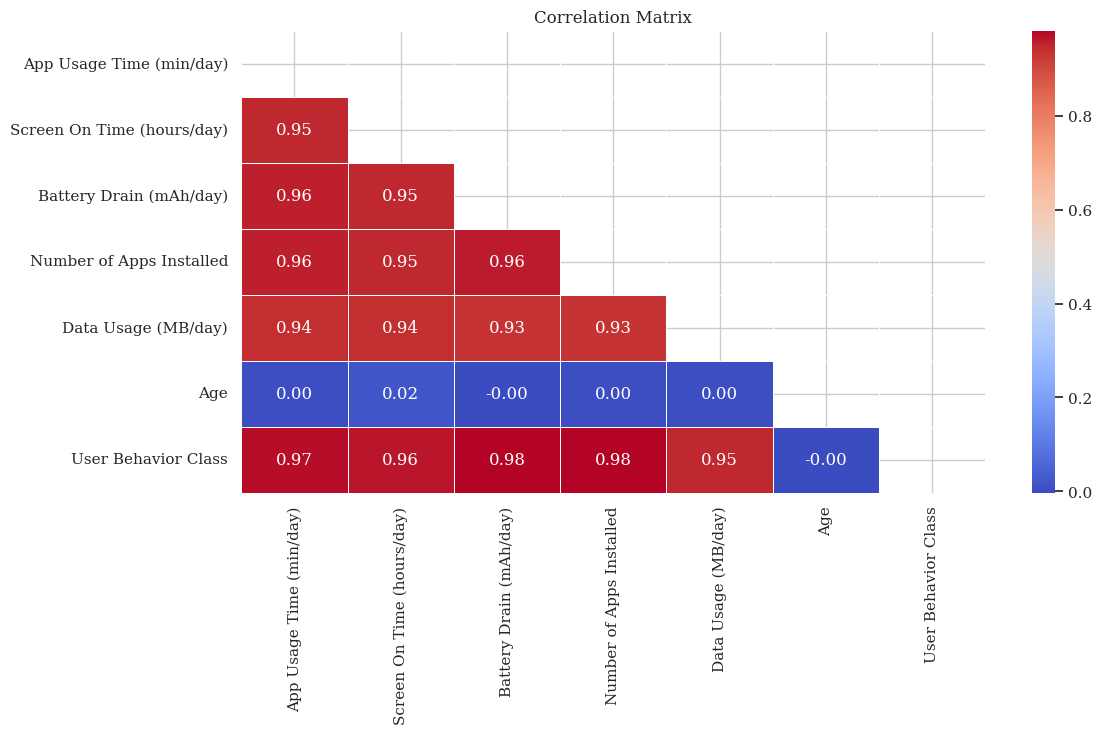

In [14]:
numerical_data = data[num_col]
corr = numerical_data.corr()

# Plot the correlation matrix
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax, fmt='.2f', linewidths=.5, mask=np.triu(corr))

# Set the title
ax.set_title('Correlation Matrix')

# Show the plot
plt.show()

## Comparative Analysis

In [25]:
# Definitions
android_devices = ['Google Pixel 5', 'OnePlus 9', 'Xiaomi Mi 11', 'Samsung Galaxy S21']
ios_devices = ['iPhone 12']
comparative_metrics = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Data Usage (MB/day)']

# Create a new column for the device category
data['Device Category'] = data['Device Model'].apply(lambda x: 'Android' if x in android_devices else 'iOS')
data['Device Model'] = pd.Categorical(data['Device Model'], categories=android_devices + ios_devices, ordered=True)
data_sorted = data.sort_values(by='Device Model')

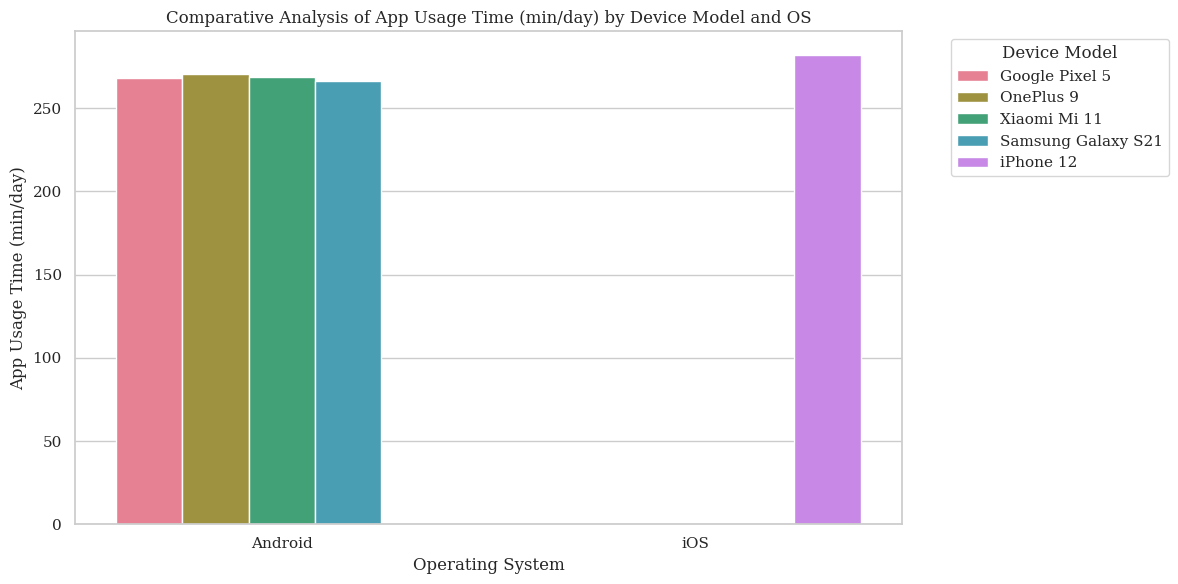

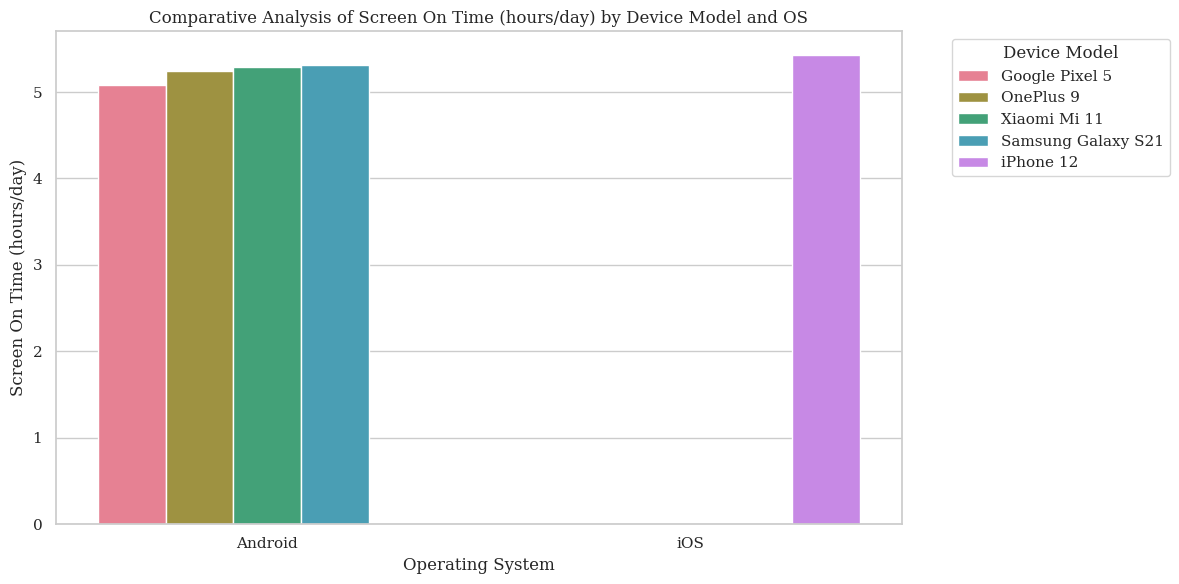

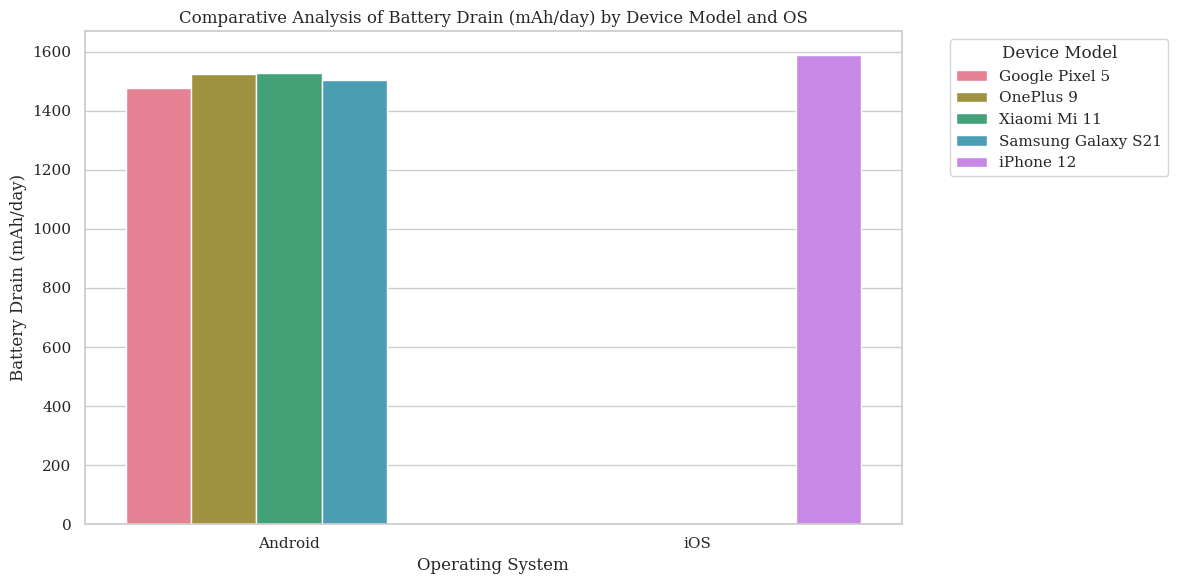

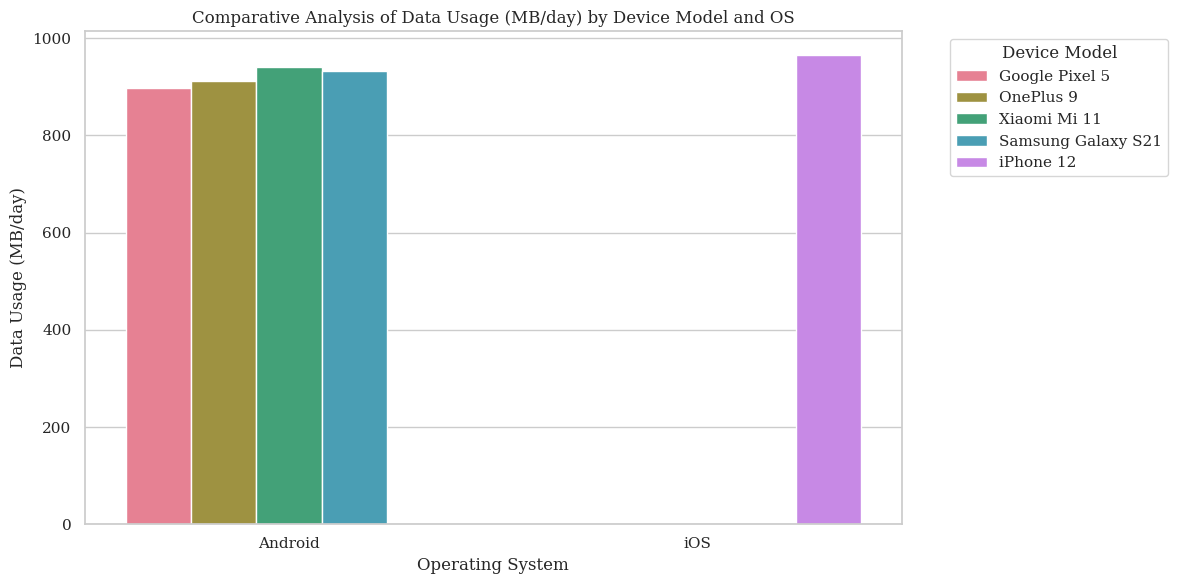

In [26]:
comparative_analysis(data_sorted, comparative_metrics)

## Segmentation Analysis

In [27]:
# Definitions
segmentation_metrics = ['App Usage Time (min/day)', 'Battery Drain (mAh/day)']

grouped_data = data.groupby(['Age', 'Gender']).agg({
    'App Usage Time (min/day)': 'mean',
    'Battery Drain (mAh/day)': 'mean'
}).reset_index()

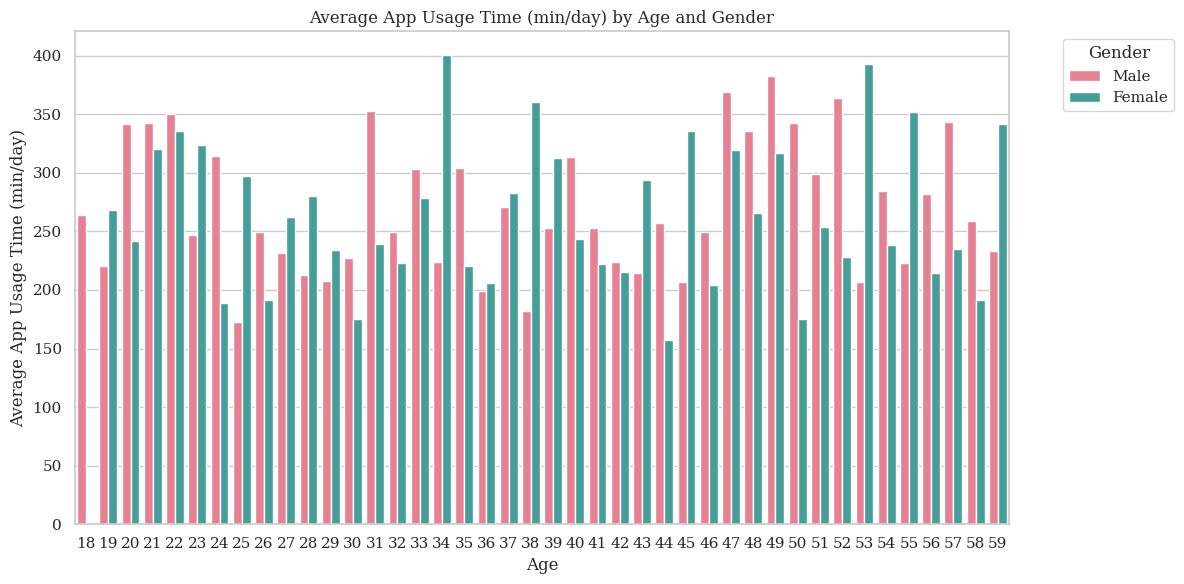

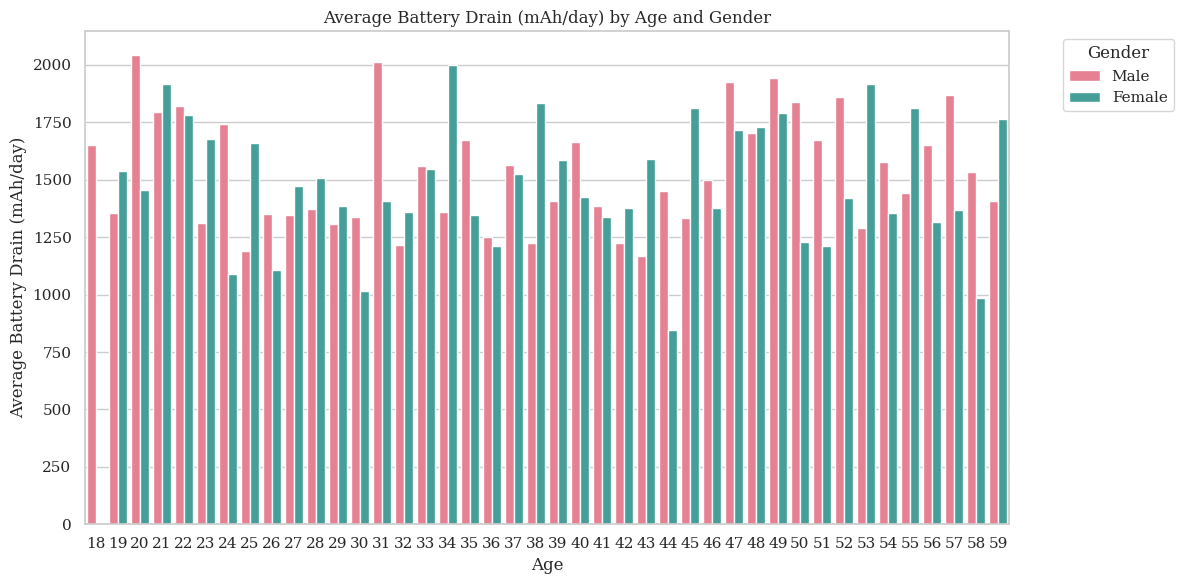

In [28]:
for metric in segmentation_metrics:
    segmentation_analysis(grouped_data, 'Age', metric, 'Gender')